In [12]:

%pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 17.6 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 15.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 16.8 MB/s eta 0:00:01
   ----

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


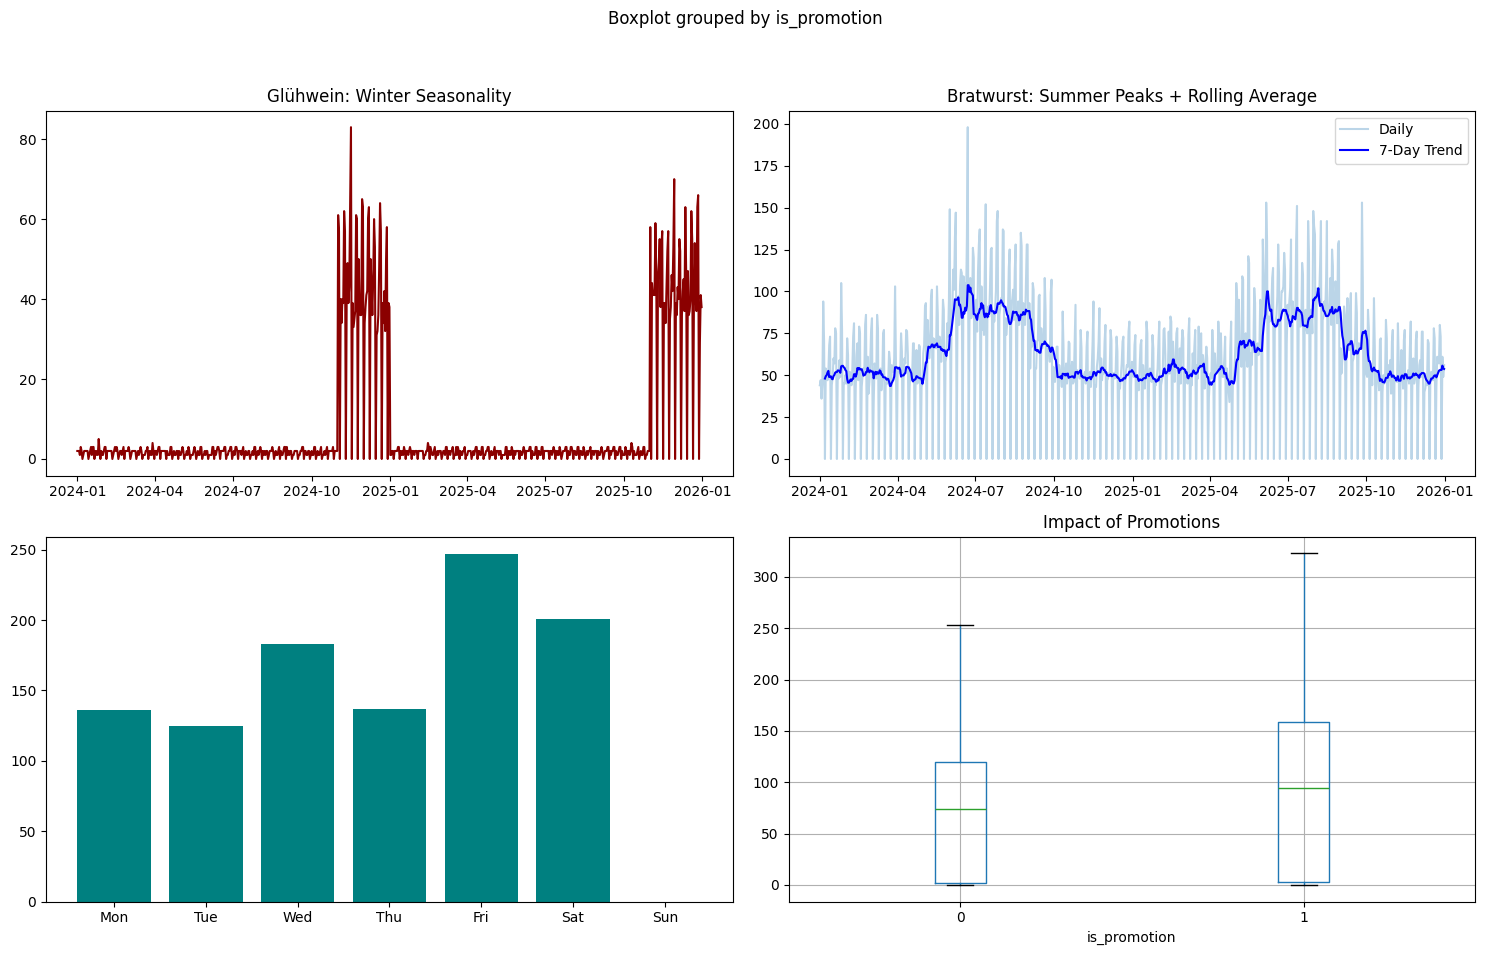

In [7]:
# 1. Load and Prepare
df = pd.read_csv('german_retail_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['product_id', 'date'])

# 2. Feature Engineering (The "AI Brain" parts)
# Create a 7-day rolling average for each product
df['rolling_7d'] = df.groupby('product_id')['sales_quantity'].transform(lambda x: x.rolling(window=7).mean())

# Create a 'Lag' (Yesterday's sales)
df['lag_1'] = df.groupby('product_id')['sales_quantity'].shift(1)

# 3. Visualization Dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('German Retail Data Analysis Dashboard', fontsize=16)

# Chart 1: Glühwein (Seasonality)
gluh = df[df['product_name'] == 'Glühwein']
axes[0, 0].plot(gluh['date'], gluh['sales_quantity'], color='darkred')
axes[0, 0].set_title('Glühwein: Winter Seasonality')

# Chart 2: Bratwurst (Summer + Rolling Average)
brat = df[df['product_name'] == 'Bratwurst']
axes[0, 1].plot(brat['date'], brat['sales_quantity'], alpha=0.3, label='Daily')
axes[0, 1].plot(brat['date'], brat['rolling_7d'], color='blue', label='7-Day Trend')
axes[0, 1].set_title('Bratwurst: Summer Peaks + Rolling Average')
axes[0, 1].legend()

# Chart 3: The Sunday Effect (Zoom in on 2 weeks)
zoom = df[(df['product_name'] == 'Pretzel') & (df['date'] < '2024-02-01')]
axes[1, 0].bar(zoom['date'].dt.strftime('%a'), zoom['sales_quantity'], color='teal')
axes[1, 1].set_title('Weekly Cycle: The Sunday Zero-Sales')

# Chart 4: Correlation (Promo vs Sales)
df.boxplot(column='sales_quantity', by='is_promotion', ax=axes[1, 1])
axes[1, 1].set_title('Impact of Promotions')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


--- Model Evaluation ---
Mean Absolute Error: 6.20 units


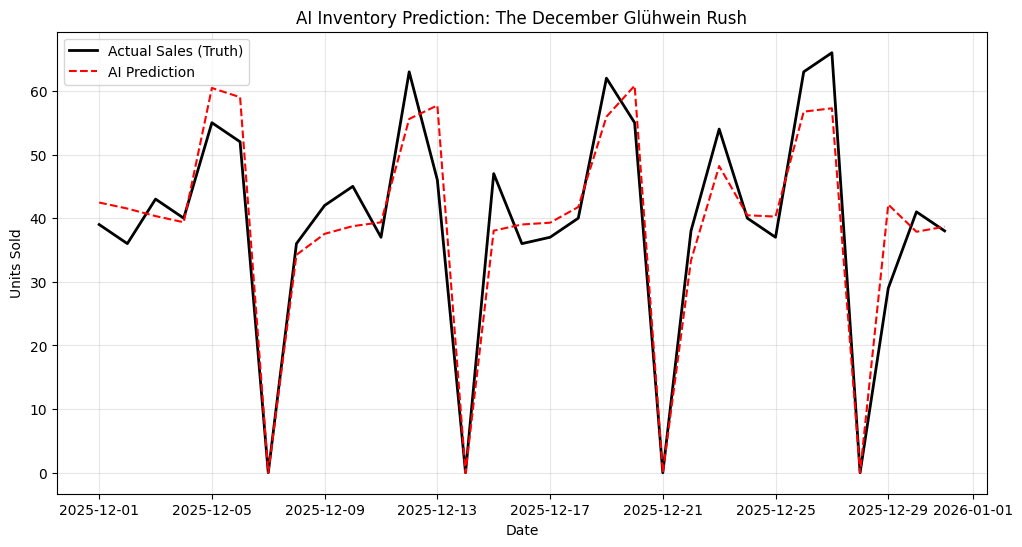

In [14]:

# 1. Load the dataset we generated earlier
df = pd.read_csv('german_retail_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['product_id', 'date'])

# 2. Feature Engineering: Turning dates into math the AI understands
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['lag_1'] = df.groupby('product_id')['sales_quantity'].shift(1)
df['rolling_7d'] = df.groupby('product_id')['sales_quantity'].transform(lambda x: x.rolling(window=7).mean())

# Drop rows with NaN (the first 7 days where we don't have rolling averages yet)
df = df.dropna()

# 3. Train/Test Split: Using the past to predict the future
# We train on everything before December 2025
train = df[df['date'] < '2025-12-01']
# We test on December 2025 (The Christmas Rush)
test = df[df['date'] >= '2025-12-01']

features = ['product_id', 'month', 'day_of_week', 'is_promotion', 'is_holiday', 'lag_1', 'rolling_7d']
X_train, y_train = train[features], train['sales_quantity']
X_test, y_test = test[features], test['sales_quantity']

# 4. Initialize and Train the Model
# RandomForest is excellent for retail data with non-linear patterns
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Generate Predictions
test = test.copy()
test['prediction'] = model.predict(X_test)

# 6. Evaluate: How close were we?
mae = mean_absolute_error(y_test, test['prediction'])
print(f"--- Model Evaluation ---")
print(f"Mean Absolute Error: {mae:.2f} units")

# 7. Visualize the Results for Glühwein
gluh_test = test[test['product_name'] == 'Glühwein']
plt.figure(figsize=(12, 6))
plt.plot(gluh_test['date'], gluh_test['sales_quantity'], label='Actual Sales (Truth)', color='black', linewidth=2)
plt.plot(gluh_test['date'], gluh_test['prediction'], label='AI Prediction', color='red', linestyle='--')
plt.title('AI Inventory Prediction: The December Glühwein Rush')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from datetime import timedelta

# 1. Setup & Data Loading
df = pd.read_csv('german_retail_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['product_id', 'date'])

# 2. Re-create Features for Training
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['lag_1'] = df.groupby('product_id')['sales_quantity'].shift(1)
df['rolling_7d'] = df.groupby('product_id')['sales_quantity'].transform(lambda x: x.rolling(window=7).mean())
df = df.dropna()

# 3. Train on All History (Prepping for the future)
features = ['product_id', 'month', 'day_of_week', 'is_promotion', 'is_holiday', 'lag_1', 'rolling_7d']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(df[features], df['sales_quantity'])

# 4. Generate the 30-Day January 2026 Forecast
# We will forecast for 'Bratwurst' (ID 101) as an example
prod_id = 101
last_data = df[df['product_id'] == prod_id].iloc[-1]
curr_lag = last_data['sales_quantity']
curr_rolling = last_data['rolling_7d']

forecast_dates = pd.date_range(start=df['date'].max() + timedelta(days=1), periods=30)
results = []

for d in forecast_dates:
    # Prepare input for the AI
    input_row = pd.DataFrame([{
        'product_id': prod_id,
        'month': d.month,
        'day_of_week': d.weekday(),
        'is_promotion': 0, # Assuming no promos for now
        'is_holiday': 0,
        'lag_1': curr_lag,
        'rolling_7d': curr_rolling
    }])
    
    # Predict & apply the "Sunday Rule"
    prediction = model.predict(input_row[features])[0]
    if d.weekday() == 6: prediction = 0 
    
    results.append({'Date': d.strftime('%Y-%m-%d'), 'Day': d.day_name(), 'Forecast': round(prediction)})
    
    # Update Lag and Rolling for the next iteration
    curr_lag = prediction
    curr_rolling = (curr_rolling * 6 + prediction) / 7

# 5. Show the Order List
forecast_df = pd.DataFrame(results)
print("--- JANUARY 2026 INVENTORY FORECAST ---")
print(forecast_df.head(10))

--- JANUARY 2026 INVENTORY FORECAST ---
         Date        Day  Forecast
0  2026-01-01   Thursday        48
1  2026-01-02     Friday        78
2  2026-01-03   Saturday        85
3  2026-01-04     Sunday         0
4  2026-01-05     Monday        50
5  2026-01-06    Tuesday        50
6  2026-01-07  Wednesday        50
7  2026-01-08   Thursday        49
8  2026-01-09     Friday        68
9  2026-01-10   Saturday        79


In [16]:
# Assuming 'forecast_df' from the previous step is available
# Let's set a 'Safety Threshold' of 50 units for Bratwurst
SAFETY_THRESHOLD = 50

print("--- 🛒 ACTIONABLE ORDER LIST: JANUARY 2026 ---")
print(f"{'Date':<15} | {'Forecast':<10} | {'Action Required'}")
print("-" * 50)

for index, row in forecast_df.iterrows():
    action = ""
    # If the forecast is above our threshold and it's not a Sunday (0 sales)
    if row['Forecast'] > SAFETY_THRESHOLD:
        action = f"⚠️ ORDER NOW: Demand spike of {row['Forecast']} units"
    elif row['Forecast'] == 0:
        action = "💤 SHOP CLOSED (No stock needed)"
    else:
        action = "✅ Stock Sufficient"
    
    print(f"{row['Date']:<15} | {row['Forecast']:<10} | {action}")

--- 🛒 ACTIONABLE ORDER LIST: JANUARY 2026 ---
Date            | Forecast   | Action Required
--------------------------------------------------
2026-01-01      | 48         | ✅ Stock Sufficient
2026-01-02      | 78         | ⚠️ ORDER NOW: Demand spike of 78 units
2026-01-03      | 85         | ⚠️ ORDER NOW: Demand spike of 85 units
2026-01-04      | 0          | 💤 SHOP CLOSED (No stock needed)
2026-01-05      | 50         | ✅ Stock Sufficient
2026-01-06      | 50         | ✅ Stock Sufficient
2026-01-07      | 50         | ✅ Stock Sufficient
2026-01-08      | 49         | ✅ Stock Sufficient
2026-01-09      | 68         | ⚠️ ORDER NOW: Demand spike of 68 units
2026-01-10      | 79         | ⚠️ ORDER NOW: Demand spike of 79 units
2026-01-11      | 0          | 💤 SHOP CLOSED (No stock needed)
2026-01-12      | 46         | ✅ Stock Sufficient
2026-01-13      | 45         | ✅ Stock Sufficient
2026-01-14      | 46         | ✅ Stock Sufficient
2026-01-15      | 49         | ✅ Stock Sufficient
